In [32]:
import pandas as pd
import numpy as np

In [33]:
df=pd.read_csv('/content/gender_classification_v7.csv')
df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [34]:
# отбор числовых колонок (Числовые признаки)

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
df_numeric

['long_hair' 'forehead_width_cm' 'forehead_height_cm' 'nose_wide'
 'nose_long' 'lips_thin' 'distance_nose_to_lip_long']


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [35]:
# отбор нечисловых колонок (Категориальные признаки)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)
df_non_numeric

['gender']


,gender
0,Male
1,Female
2,Male
3,Male
4,Female
...,...
4996,Female
4997,Female
4998,Female
4999,Female


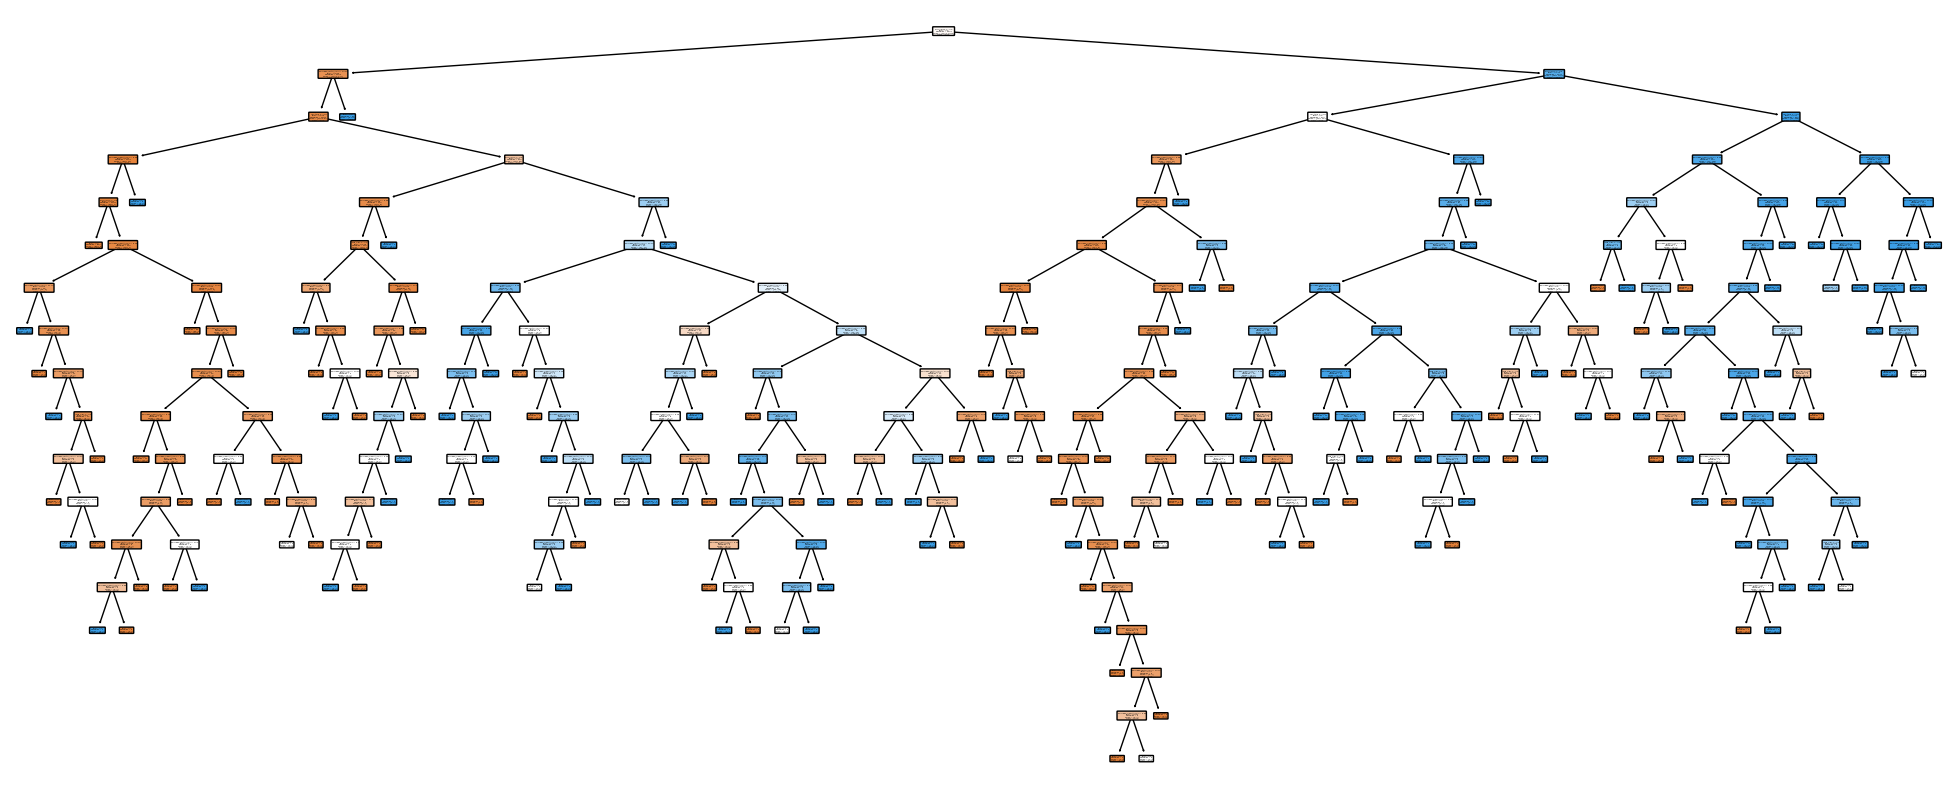

In [36]:
#Обучение (создание) дерева
from sklearn.tree import DecisionTreeClassifier, plot_tree# модуль для деревьев
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X=df.iloc[:,:6] # примеры входов
y=df.iloc[:,7] # метки (примеры выходов)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую # тестируем для другой точки


clf = DecisionTreeClassifier() # создаем классификатор на основе дерева
clf = clf.fit(X_train, y_train) # обучаем его, т.е. создаем само дерево
y_score=clf.predict(X_test)
plt.figure(figsize=((25,10)))
plot_tree(clf,filled=True, feature_names=list(X),class_names=y.unique(),rounded=True)
plt.show()

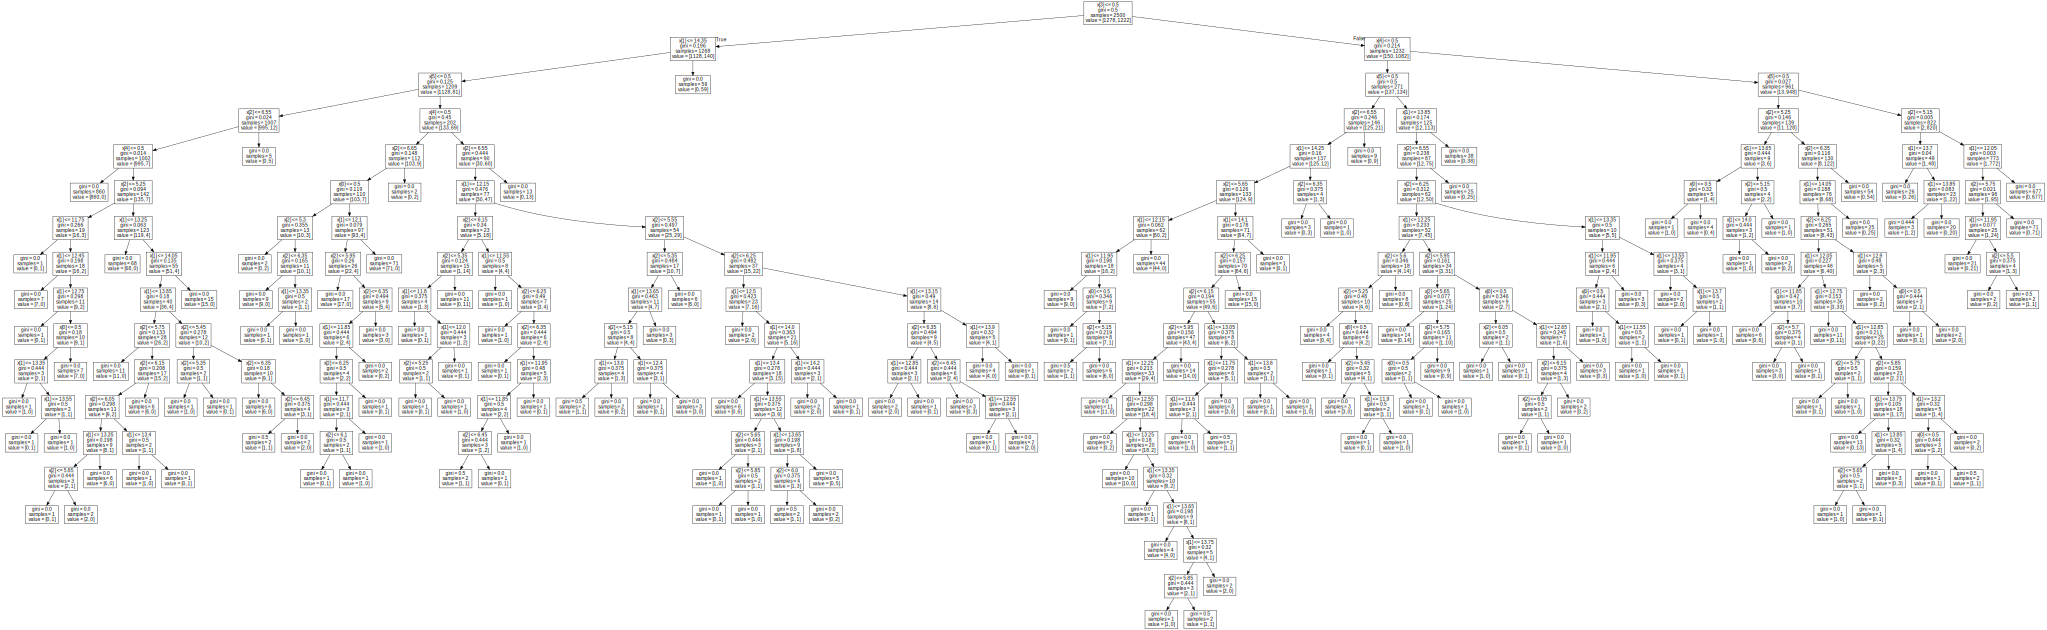

In [37]:
import graphviz # подключаем библиотеку для отображения деревьев
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf, out_file=None) # конвертируем в DOT (в переменную или в файл)
graph = graphviz.Source(dot_data)  # загружаем дерево из переменной или файла в представление graphviz
graph

In [38]:
from sklearn.tree import export_text # подключаем функцию
r = export_text(clf, feature_names=list(X)) # переводим дерево в текстовую строку
print(r) # печатаем

|--- nose_wide <= 0.50
|   |--- forehead_width_cm <= 14.35
|   |   |--- lips_thin <= 0.50
|   |   |   |--- forehead_height_cm <= 6.55
|   |   |   |   |--- nose_long <= 0.50
|   |   |   |   |   |--- class: Female
|   |   |   |   |--- nose_long >  0.50
|   |   |   |   |   |--- forehead_height_cm <= 5.25
|   |   |   |   |   |   |--- forehead_width_cm <= 11.75
|   |   |   |   |   |   |   |--- class: Male
|   |   |   |   |   |   |--- forehead_width_cm >  11.75
|   |   |   |   |   |   |   |--- forehead_width_cm <= 12.45
|   |   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |   |   |--- forehead_width_cm >  12.45
|   |   |   |   |   |   |   |   |--- forehead_width_cm <= 12.75
|   |   |   |   |   |   |   |   |   |--- class: Male
|   |   |   |   |   |   |   |   |--- forehead_width_cm >  12.75
|   |   |   |   |   |   |   |   |   |--- long_hair <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- forehead_width_cm <= 13.35
|   |   |   |   |   |   |   |   |   |   |   |--- class: F

In [39]:
from sklearn.datasets import make_classification # для генерации данных
from sklearn.model_selection import train_test_split # для разделения на обучение и тест
from sklearn.ensemble import RandomForestClassifier # случайный лес
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import numpy as np
import seaborn as sns # для простого отображения
import matplotlib.pyplot as plt #

# Создаем классификатор на основе случайного леса. Изменяйте параметры и смотрите как это влияет на обучение
clf = RandomForestClassifier(max_depth=5,# максимальная глубина дерева
                             n_estimators=10,# число деревьев в лесу
                             max_features=1)# максимальное число признаков для каждого дерева

clf.fit(X_train, y_train) # обучаем

y_pred = clf.predict(X_test) # проверяем на тестовых данных

score=clf.score(X_test, y_test) # считаем среднюю точность
print(score)

# оценка точности модели
print(metrics.classification_report(y_test, y_pred))
# матрица неточности
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

0.9628148740503798
              precision    recall  f1-score   support

      Female       0.96      0.97      0.96      1223
        Male       0.97      0.96      0.96      1278

    accuracy                           0.96      2501
   macro avg       0.96      0.96      0.96      2501
weighted avg       0.96      0.96      0.96      2501

[[1183   40]
 [  53 1225]]


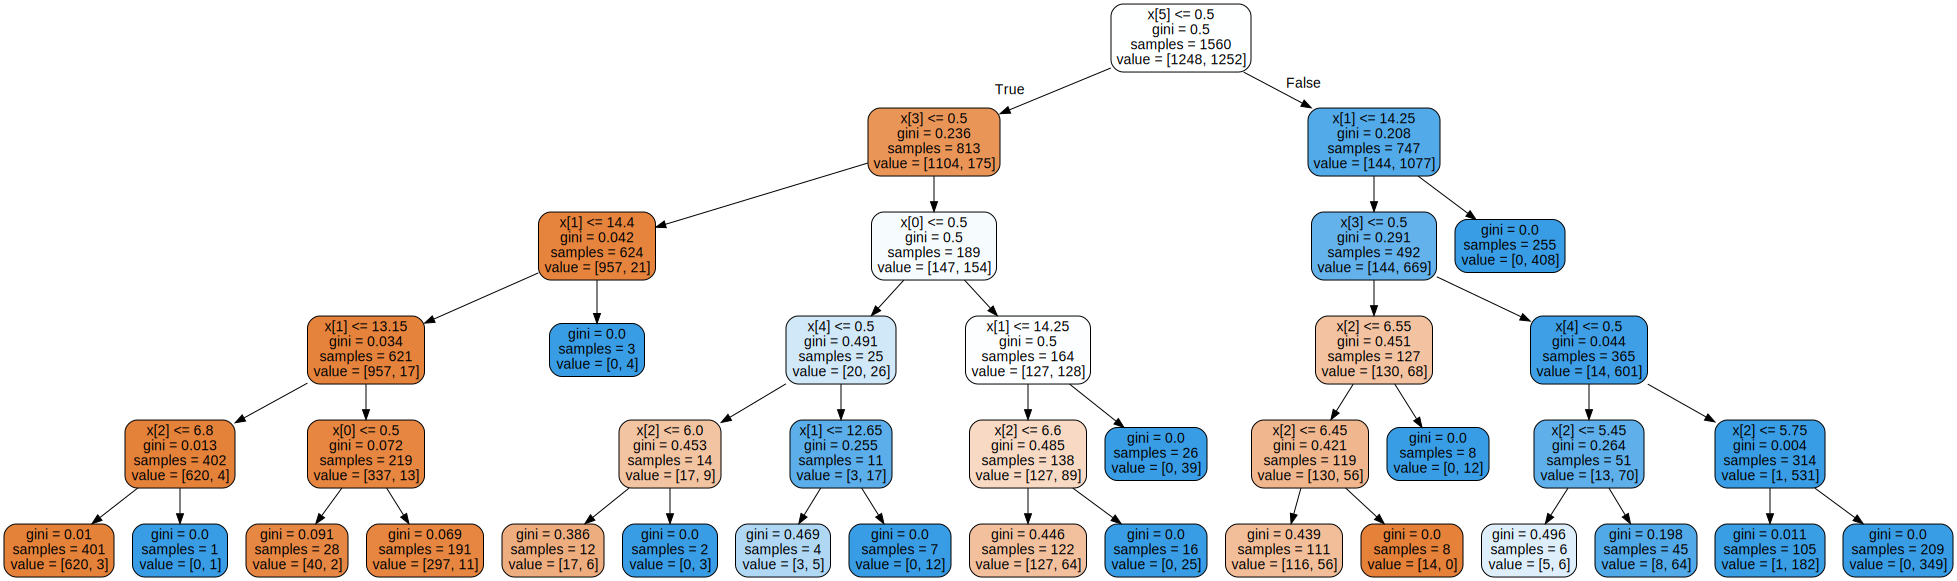

In [40]:
tree_data=clf.estimators_[2] # третье дерево

# рисуем его
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_data, out_file=None,  # можем указать дополнительные опции конвертации
                     filled=True, rounded=True)  # прочие детали отображения
graph = graphviz.Source(dot_data)  # # загружаем дерево из переменной или файла в представление graphviz
graph  # отображаем на экране

In [41]:
# разделяем на обучающие и тестовые
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# создаем классификатор
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2)
# обучаем его
clf.fit(X_train, y_train)
# проверяем на тестовых данных
pred = clf.predict(X_test)
# считаем метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average="macro")
precision = precision_score(y_test, pred, average="macro")
recall=recall_score(y_test, pred, average="macro")
print('Accuracy=',accuracy)
print('F1=',f1)
print('Precision=',precision)
print('Recall=',recall)

Accuracy= 0.9733510992671552
F1= 0.973338212150386
Precision= 0.9736710210610504
Recall= 0.9732269371317772


Text(0.5, 1.1, 'Матрица неточности\n')

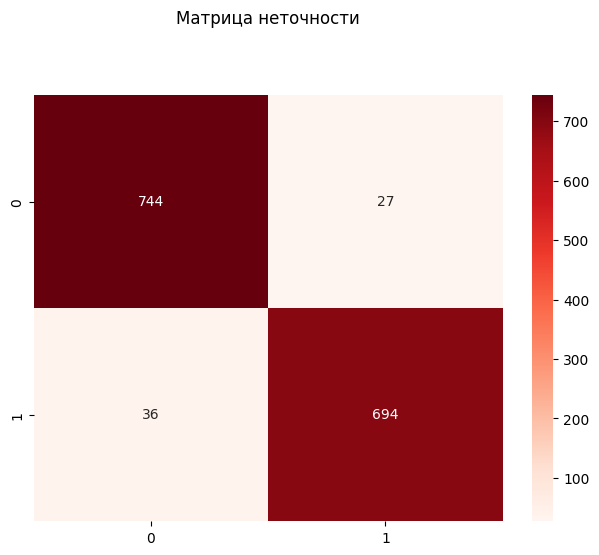

In [13]:
# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, pred)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности\n', y=1.1)

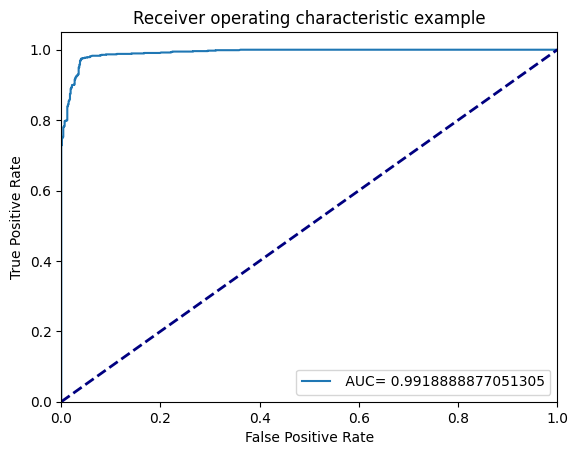

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
from sklearn. linear_model import LogisticRegression

y_test = y_test.map({'Male': 1, 'Female': 0}).astype(int)
log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

lw = 2
#create ROC curve
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()